In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv(r'/content/processed-data.csv')
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [ ]:
df = df.drop(columns=['Severity_Mild', 'Severity_Moderate'])
df.rename(columns={'Severity_None': 'Target'}, inplace=True)

In [ ]:
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Target
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0


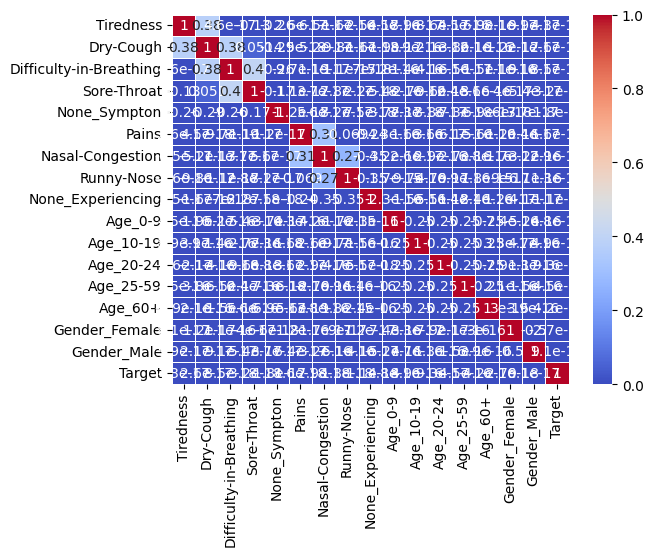

In [ ]:
crrM = df.corr()
sns.heatmap(crrM, vmin=0, vmax=1, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [ ]:
x = df.drop(columns=['Target'])
y  = df['Target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

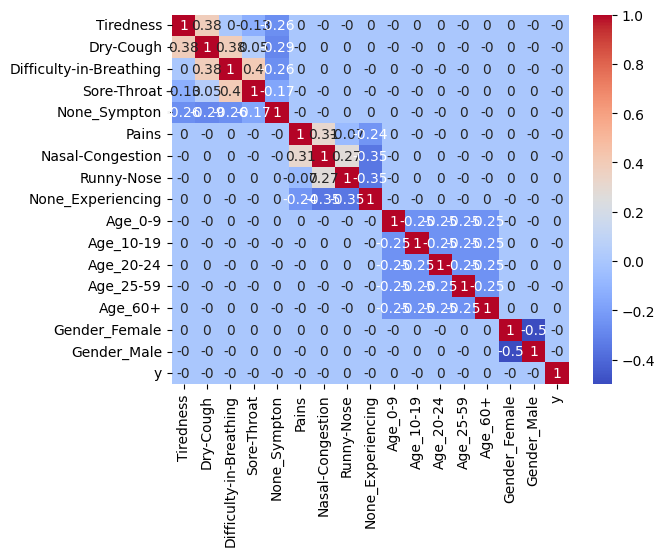

In [ ]:
df_smote = pd.DataFrame(x_train, columns=x_train_res.columns)
df_smote['y'] = y_train_res

correlation_matrix = df_smote.corr().round(2)
sns.heatmap(data=correlation_matrix,cmap="coolwarm", annot=True)

plt.show()

In [ ]:
logreg_model = LogisticRegression()

logreg_model.fit(x_train_res, y_train_res)

y_pred = logreg_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred,zero_division=1))

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.501462542087542

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.51      0.61     71371
           1       0.24      0.48      0.32     23669

    accuracy                           0.50     95040
   macro avg       0.49      0.49      0.46     95040
weighted avg       0.62      0.50      0.54     95040


Confusion Matrix:
[[36406 34965]
 [12416 11253]]


In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=42)

dt_model.fit(x_train_res, y_train_res)

y_pred_dt = dt_model.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

print('\nDecision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt, zero_division=1))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print('\nDecision Tree Confusion Matrix:')
print(conf_matrix_dt)


Decision Tree Accuracy: 0.4813341750841751

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59     71371
           1       0.22      0.42      0.29     23669

    accuracy                           0.48     95040
   macro avg       0.47      0.46      0.44     95040
weighted avg       0.60      0.48      0.52     95040


Decision Tree Confusion Matrix:
[[35743 35628]
 [13666 10003]]


In [ ]:
classifier = GaussianNB()
classifier.fit(x_train_res, y_train_res)


y_pred_gnb = classifier.predict(x_test)


accuracy = accuracy_score(y_test, y_pred_gnb)
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
class_report = classification_report(y_test, y_pred_gnb,zero_division=1)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.5140782828282828
Confusion Matrix:
[[38210 33161]
 [13021 10648]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.54      0.62     71371
           1       0.24      0.45      0.32     23669

    accuracy                           0.51     95040
   macro avg       0.49      0.49      0.47     95040
weighted avg       0.62      0.51      0.55     95040



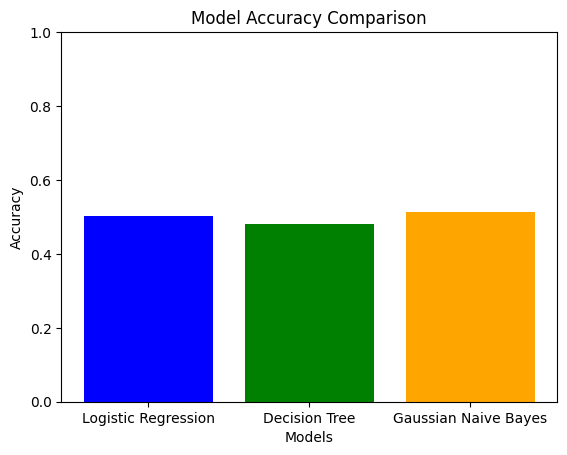

In [ ]:
accuracy_logreg = accuracy_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Bar chart
models = ['Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes']
accuracies = [accuracy_logreg, accuracy_dt, accuracy_gnb]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()